<div style="text-align: center; color: red;"><h2>NLP Project: Amazon Reviews Sentiment Analysis by GenMinds (Machine Learning notebook)</h2></div>

In the previous notebook, we went over exploring the Amazon Reviews 23 dataset, mainly the 'All Beauty' category. The original one had around 700K entries and was quite unbalanced that we had to undersample it. We also pre-processed it to be ready for use with the various model algorithms.

# Import modules

In [1]:
import os
from utils import *
from typing import Union

import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics import classification_report, confusion_matrix

import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load the dataset extracted last time

In [2]:
df = pd.read_csv('GenMinds_Balanced_Dataset_All_Beauty.csv', index_col=0)

In [3]:
df.head()

,review_text,label
0,one star bad,0
1,three stars okay,1
2,missing bottle defective sprayer instead 4 bot...,0
3,disappointed little disappointed product case ...,1
4,don’t stay began peeling 20 minutes putting on,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168921 entries, 0 to 168920
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_text  168848 non-null  object
 1   label        168921 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.9+ MB


# Fixing import issues & Tokenization

In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168848 entries, 0 to 168847
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   review_text  168848 non-null  object
 1   label        168848 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ MB


In [7]:
df['tokens'] = df['review_text'].apply(word_tokenize)

# TF-IDF approach

TF-IDF, which stands for $\textit{Term Frequency-Inverse Document Frequency}$, is a statistical approach that is used in NLP tasks to evaluate the importance of a word in a document relative to a corpus (a collection of documents). The formulas are as follows:

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250207113146020518/The-TF-Formula.webp">
    <img src="https://media.geeksforgeeks.org/wp-content/uploads/20250207113218469447/IDF-Formula.webp">
</figure>

- TF aims to determine the frequency of a term in a document which, alone, does not account for its global importance across the corpus.
Also, common stopwords like 'the' or 'and' may have high scores but are not meaningful.

- IDF highlights the importance of rare words by reducing the weight of common words. And through the logarithmic formula, the IDF scores scale appropriately. It is to note, however, that a term might be rare across the corpus but is irrelevant in a specific document.

You can read more about TF-IDF <a href="https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/">here</a>.

We'll approach training our models based on this method first. Then, we'll move on to something else.

In [8]:
tfidf = TfidfVectorizer(max_features=7500)
print("Model created! Training...")
X_tfidf = tfidf.fit_transform(df['review_text'])
print("Training complete!")

Model created! Training...
Training complete!


In [9]:
# Convert the sparse matrix to a dense format and store it in a dataframe
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
y = df['label']

In [10]:
X_tfidf_df

,05,10,100,1000,10000,1010,1015,1050,1090,10a,...,zero,zinc,zip,ziploc,ziplock,zipper,zippered,zippers,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, y, test_size=0.2, random_state=42)

<h1>NOTE: If you already have the trained models saved, the notebook will automatically reload it for you. Otherwise, it will create it and train it.</h1>

## XGBoost

Our first model of choice is eXtreme Gradient Boosting, a machine learning algorithm based on gradient boosting, which combines the outcome of weak learners, typically decision trees, to create a strong predictive model. It improves upon standard gradient through performance optimization.

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://www.researchgate.net/publication/345327934/figure/fig3/AS:1022810793209856@1620868504478/Flow-chart-of-XGBoost.png">
</figure>

Some of its hyperparameters include:

+ `tree_method`: The algorithm used for constructing decision trees (`exact` for greedy construction, `approx`, `hist` and `gpu_hist`).
+ `n_estimators`: The number of trees to train.
+ `learning_rate`: The step size for each tree's contribution to the final prediction.
+ `max_depth`: The maximum depth of each tree.
+ `eval_metric`: The evaluation metric used for validation (`rmse` for regression, `logloss` and `mlogloss` for classification depending on the number of classes).
+ `random_state`: The seed for the random number generation, a fixed number ensures the same results can be reproduced every time.

In [12]:
# Initialize the model or load from file if it exists
file = './models/xgb_tfidf_model.joblib'

if os.path.exists(file):
    xgb_tfidf_model = load_model(file)

else:
    print("Failed to fetch model file. Creating the model...")
    xgb_tfidf_model = xgb.XGBClassifier(
        tree_method="gpu_hist", # Use GPU acceleration
        max_depth=6,
        learning_rate=0.1,
        n_estimators=300,
        random_state=42,
        verbosity=2, # Controls general logs
        eval_metric="mlogloss" # Multi-class log loss
    )
    print("Model created! Training...")
    xgb_tfidf_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True) # Requires about 8GB of memory

Trying to load model from file ./models/xgb_tfidf_model.joblib...
Loaded model successfully!


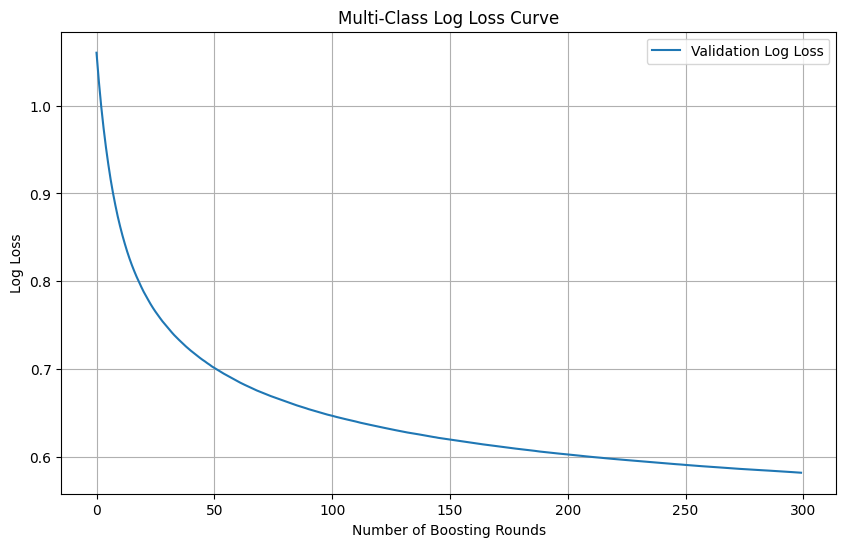

In [13]:
# Extract the evaluation results (mlogloss) from the training process
evals_result = xgb_tfidf_model.evals_result()

# Plot the multi-log loss curve
plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['mlogloss'], label='Validation Log Loss')
plt.title('Multi-Class Log Loss Curve')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()

We notice a good curve where the log loss starts to cap at 0.57.

In [14]:
# Predict on the test set
xgb_tfidf_y_pred = xgb_tfidf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, xgb_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_tfidf_y_pred))

c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [12:11:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\xgboost\core.py:729: UserWarning: [12:11:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

 

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     11427
           1       0.69      0.66      0.68     11372
           2       0.85      0.81      0.83     10971

    accuracy                           0.76     33770
   macro avg       0.76      0.76      0.76     33770
weighted avg       0.76      0.76      0.76     33770

Confusion Matrix:
[[9047 1983  397]
 [2594 7553 1225]
 [ 673 1365 8933]]


The model, despite being trained on TF-IDF data, shows decent results across all classes with values of class 1 (Neutral) lower than its counterparts. The precision, recall and f1-score values show promising performance. But, will it hold up ? Let's find out!

In [42]:
def map_results(predictions):
    label_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    predicted_sentiments = [label_mapping[label] for label in predictions]

    return predicted_sentiments

In [32]:
# Example input text
new_texts = ["I wasn't expecting much, but this exceeded my expectations." 
             "The build quality feels premium, and the instructions were "
             "easy to follow. Setup took under 10 minutes, and it's been "
             "working flawlessly ever since. I've used it daily without "
             "any issues. Definitely worth the price and would happily "
             "recommend it to anyone looking for a reliable option in this category.", # Positive

             "It works as described, but there's nothing particularly "
             "special about it. The performance is fine for basic tasks, "
             "though I did notice some minor lag during more demanding use. "
             "Packaging was a bit flimsy, but the item arrived intact. "
             "If you're looking for something simple and functional, "
             "this will do, just don't expect premium quality or standout features.", # Neutral

             "Pretty disappointed overall. The product didn't match the "
             "pictures and felt cheaply made. It stopped working properly "
             "after just a few uses, and customer service was slow to respond. "
             "I tried troubleshooting it myself, but nothing helped. For the price, "
             "I expected a much better experience. Wouldn't buy again, and I'd "
             "recommend looking elsewhere if you need something dependable." # Negative
            ]

# Transform the new text using the trained TF-IDF vectorizer
new_texts = [remove_punctuation(text).lower() for text in new_texts]
new_texts = [remove_stopwords(text) for text in new_texts]
X_new = tfidf.transform(new_texts)

Above are some test sentences that need to undergo the same data transformations as the training set (punctuation removal, deleting stopwords and lowercase in this context, there are no emojis though). Will the current model be able to correctly classify them ?

In [33]:
# Predict class labels using the XGB model
xgb_predicted_labels = xgb_tfidf_model.predict(X_new)

predicted_sentiments = map_results(xgb_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: wasnt expecting much but exceeded expectationsthe build quality feels premium instructions easy follow setup took 10 minutes working flawlessly ever since ive used daily without issues definitely worth price would happily recommend anyone looking reliable option category -> Sentiment: Positive
Review: works described but theres nothing particularly special performance fine basic tasks though notice minor lag demanding use packaging bit flimsy but item arrived intact youre looking something simple functional dont expect premium quality standout features -> Sentiment: Positive
Review: pretty disappointed overall product didnt match pictures felt cheaply made stopped working properly uses customer service slow respond tried troubleshooting but nothing helped price expected much better experience wouldnt buy id recommend looking elsewhere need something dependable -> Sentiment: Positive


It seems our model couldn't properly classify these review texts.

In [ ]:
if not os.path.exists('./models/xgb_tfidf_model.joblib'):
    joblib.dump(xgb_tfidf_model, './models/xgb_tfidf_model.joblib')

## Random Forest

Random Forest is a derivative of Decision Tree, an ensemble learning algorithm that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It trains each tree on a random subset of the data, also known as `bagging`. The final prediction is made by majority voting (classification) or averaging (regression), making it robust and less prone to overfitting than individual decision trees.

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://miro.medium.com/v2/resize:fit:1010/1*R3oJiyaQwyLUyLZL-scDpw.png">
</figure>

We'll be simply setting the number of estimators `n_estimators` to 300 with a `max_depth` of 10. Note that, this time, we'll be training on the CPU since GPU support for Random Forest is only available through cuML, which doesn't support Windows yet.

In [18]:
# Initialize the model or load from file if it exists
file = './models/rf_tfidf_model.joblib'

if os.path.exists(file):
    rf_tfidf_model = load_model('./models/rf_tfidf_model.joblib')

else:
    print("Failed to fetch model file. Creating the model...")
    rf_tfidf_model = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42)
    print("Model created! Training...")
    rf_tfidf_model.fit(X_train, y_train)

Trying to load model from file ./models/rf_tfidf_model.joblib...
Loaded model successfully!


In [19]:
rf_tfidf_y_pred = rf_tfidf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, rf_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_tfidf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     11427
           1       0.70      0.56      0.62     11372
           2       0.70      0.86      0.77     10971

    accuracy                           0.71     33770
   macro avg       0.71      0.71      0.71     33770
weighted avg       0.71      0.71      0.71     33770

Confusion Matrix:
[[8207 1670 1550]
 [2451 6354 2567]
 [ 461 1083 9427]]


In [34]:
rf_predicted_labels = rf_tfidf_model.predict(X_new)

predicted_sentiments = map_results(rf_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: wasnt expecting much but exceeded expectationsthe build quality feels premium instructions easy follow setup took 10 minutes working flawlessly ever since ive used daily without issues definitely worth price would happily recommend anyone looking reliable option category -> Sentiment: Positive
Review: works described but theres nothing particularly special performance fine basic tasks though notice minor lag demanding use packaging bit flimsy but item arrived intact youre looking something simple functional dont expect premium quality standout features -> Sentiment: Neutral
Review: pretty disappointed overall product didnt match pictures felt cheaply made stopped working properly uses customer service slow respond tried troubleshooting but nothing helped price expected much better experience wouldnt buy id recommend looking elsewhere need something dependable -> Sentiment: Negative


c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


This model seems to improve from XGBoost and is able to classify the reviews properly.

In [ ]:
if not os.path.exists('./models/rf_tfidf_model.joblib'):
    joblib.dump(rf_tfidf_model, './models/rf_tfidf_model.joblib')

## Logistic Regression

A statistical model usually used for binary classification, logistic regression has been adapted for multinomial tasks (multi-class classification). You can think of it as linear regression but for classification tasks. It works by outputting the probability of a class. Below is the mathematical formula:

$
\begin{align}
    P(y=1|x) = \frac{1}{1+e^{-(w*x + b)}}
\end{align}
$

Where:
+ $P(y=1|x)$ is the probability of class 1.
+ $x$ represent the input features.
+ $w$ are the weights.
+ $b$ is the bias.

For a multi-class task, the formula gets adapted as follows:

$
\begin{align}
    P(y=k|x) = \frac{e^{w_{k}^{T}x + b_{k}}}{\sum_{j=1}^{K} e^{w_{j}^{T}x+b_{j}}}
\end{align}
$

Where:
+ $x$ is a feature vector.
+ $w_k, b_k$ are the weights and bias for class $k$
+ $K$ is the total number of classes.

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://i.ytimg.com/vi/L0FU8NFpx4E/sddefault.jpg">
</figure>

In [ ]:
file_path = './models/lr_tfidf_model.joblib'

if os.path.exists(file_path):
    lr_tfidf_model = load_model(file_path)

else:
    print("Creating the model...")
    lr_tfidf_model = LogisticRegression(max_iter=300, random_state=42) # 'multinomial' is better than 'ovr (one versus rest)' since the dataset is large and balanced
    print("Model created! Training...")
    lr_tfidf_model.fit(X_train, y_train)

In [25]:
lr_tfidf_y_pred = lr_tfidf_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, lr_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_tfidf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78     11427
           1       0.70      0.69      0.70     11372
           2       0.86      0.86      0.86     10971

    accuracy                           0.78     33770
   macro avg       0.78      0.78      0.78     33770
weighted avg       0.78      0.78      0.78     33770

Confusion Matrix:
[[8995 2088  344]
 [2282 7845 1245]
 [ 330 1212 9429]]


Results seem consistent across all labels with room for improvement, especially for label 1 (Neutral). Let's see how it performs.

In [35]:
lr_predicted_labels = lr_tfidf_model.predict(X_new)

predicted_sentiments = map_results(lr_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: wasnt expecting much but exceeded expectationsthe build quality feels premium instructions easy follow setup took 10 minutes working flawlessly ever since ive used daily without issues definitely worth price would happily recommend anyone looking reliable option category -> Sentiment: Positive
Review: works described but theres nothing particularly special performance fine basic tasks though notice minor lag demanding use packaging bit flimsy but item arrived intact youre looking something simple functional dont expect premium quality standout features -> Sentiment: Neutral
Review: pretty disappointed overall product didnt match pictures felt cheaply made stopped working properly uses customer service slow respond tried troubleshooting but nothing helped price expected much better experience wouldnt buy id recommend looking elsewhere need something dependable -> Sentiment: Negative


c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


This model has been able to properly classify the reviews too.

In [ ]:
if not os.path.exists('./models/lr_tfidf_model.joblib'):
    joblib.dump(lr_tfidf_model, './models/lr_tfidf_model.joblib')

## Naive Bayes (Multinomial)

Multinomial Naive Bayes is a probabilistic classification algorithm used primarily for discrete count data, like word counts in text classification. It assumes that $\textbf{features follow a multinomial distribution given its class and that said features are conditionally independent given the class}$. Let's break it down for our case.

Let's say we have the following review (document):
+ The document: "great product great"
+ Feature vector: {"great": 2, "product": 1}

And you're in the $\textbf{Positive}$ class. This assumes that there's a probability for "great" independent from the probability of "product" for the class. It also assumes that the document's word counts were generated based on those probabilities.

This is why this should work well with a TF-IDF approach. Let's try it below!

In [24]:
file = './models/nb_tfidf_model.joblib'

if os.path.exists(file):
    nb_tfidf_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    nb_tfidf_model = MultinomialNB()
    print("Model created! Training...")
    nb_tfidf_model.fit(X_train, y_train)

Trying to load model from file ./models/nb_tfidf_model.joblib...
Loaded model successfully!


In [36]:
nb_tfidf_y_pred = nb_tfidf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, nb_tfidf_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_tfidf_y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73     11427
           1       0.70      0.56      0.62     11372
           2       0.70      0.86      0.77     10971

    accuracy                           0.71     33770
   macro avg       0.71      0.71      0.71     33770
weighted avg       0.71      0.71      0.71     33770

Confusion Matrix:
[[8207 1670 1550]
 [2451 6354 2567]
 [ 461 1083 9427]]


A bad recall and f1-score on label 1 would result in poor performance. Otherwise, the other results seem decent. Let's test the model below.

In [37]:
nb_predicted_labels = nb_tfidf_model.predict(X_new)

predicted_sentiments = map_results(nb_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: wasnt expecting much but exceeded expectationsthe build quality feels premium instructions easy follow setup took 10 minutes working flawlessly ever since ive used daily without issues definitely worth price would happily recommend anyone looking reliable option category -> Sentiment: Positive
Review: works described but theres nothing particularly special performance fine basic tasks though notice minor lag demanding use packaging bit flimsy but item arrived intact youre looking something simple functional dont expect premium quality standout features -> Sentiment: Neutral
Review: pretty disappointed overall product didnt match pictures felt cheaply made stopped working properly uses customer service slow respond tried troubleshooting but nothing helped price expected much better experience wouldnt buy id recommend looking elsewhere need something dependable -> Sentiment: Negative


c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Again, it succeds in classifying the reviews.

In [ ]:
if not os.path.exists('./models/nb_tfidf_model.joblib'):
    joblib.dump(rf_tfidf_model, './models/nb_tfidf_model.joblib')

We've tried some supervised algorithms with a word frequency approach. So far, the "Random Forest" model seems to be the most performing, despite the close metrics with other tested algorithms. Now, let's move on to unsupervised ones, primarily "K-Means" clustering.

## K-Means

This algorithm will divide the dataset into a pre-defined number of classes (clusters to be more technical). It allows us to group data point such that points within each cluster are as similar as possible.

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif">
</figure>

These are the steps for this algorithm:

1) Select random $k$ initial centroids.
2) Assign each datapoint to the nearest centroid (it calculates euclidian distance by default).
3) Recompute the $k$ centroids as the average of the points assigned to each cluster.
4) Repeat steps 2 and 3 until no major changes occur in the clusters or a certain number of iterations is reached. 

In [ ]:
file = './models/kmeans_tfidf_model.joblib'
num_clusters = 3

if os.path.exists(file):
    kmeans_tfidf_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    kmeans_tfidf_model = KMeans(n_clusters=num_clusters, random_state=10, n_init=10)
    print("Model created! Training...")
    kmeans_tfidf_model.fit(X_train)

In [ ]:
kmeans_labels = kmeans_tfidf_model.labels_

In [ ]:
# Plot cluster distribution
plt.figure(figsize=(8, 5))
plt.hist(kmeans_labels, bins=np.arange(num_clusters + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(num_clusters))
plt.xlabel("Cluster")
plt.ylabel("Number of Texts")
plt.title("Distribution of Texts Across Clusters")
plt.show()

The model doesn't perform well with TF-IDF. This is to be expected since this technique doesn't capture semantic relations between words by calculating the distances in a vector space.

In [ ]:
if not os.path.exists('./models/kmeans_tfidf_model.joblib'):
    joblib.dump(kmeans_tfidf_model, './models/kmeans_tfidf_model.joblib')

## Truncated SVD (Singular Value Decomposition)

Truncated SVD is a dimensionality reduction technique that works by reducing the number of features while preserving as much of the original structure as possible.

In [ ]:
file = './models/svd_tfidf_model.joblib'

if os.path.exists(file):
    X_reduced = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    svd_tfidf_model = TruncatedSVD(n_components=2)
    print("Model created! Training...")
    X_reduced = svd_tfidf_model.fit_transform(X_train)

kmeans_tfidf_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
print("Fitting dimensionally reduced data to K-Means...")
# Apply K-Means on dimensionally reduced data
kmeans_tfidf_model.fit(X_reduced)

In [ ]:
kmeans_labels = kmeans_tfidf_model.labels_

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("K-Means Clustering of Text Data (SVD)")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Plot cluster distribution
plt.figure(figsize=(8, 5))
plt.hist(kmeans_labels, bins=np.arange(num_clusters + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(num_clusters))
plt.xlabel("Cluster")
plt.ylabel("Number of Texts")
plt.title("Distribution of Texts Across Clusters")
plt.show()

The splits are still no near as awaited. Still, it's an improvement.

In [ ]:
if not os.path.exists('./models/svd_tfidf_model.joblib'):
    joblib.dump(X_reduced, './models/svd_tfidf_model.joblib')

# Word2Vec approach

Instead of relying on term frequency, Word2Vec transforms words into dense vector representations that capture the semantic meaning. It uses a neural network trained on a large corpus to achieve this.

There are two main architectures of Word2Vec:

- CBOW (Continuous Bag of Words) which predicts a word from surrounding context.
- Skip-Gram which perdicts surrounding words from a target word.

<figure style="width: 600px; height: 500px; display: block; margin: auto;">
    <img src="https://israelg99.github.io/images/2017-03-23-Word2Vec-Explained/word2vec_diagrams.png">
</figure>

We will start off by generating embeddings for our data. First, we need to transform our sentences to a list.

### Generate embeddings

In [8]:
sentences = df['tokens'].tolist()

In [9]:
sentences[:3]

[['one', 'star', 'bad'],
 ['three', 'stars', 'okay'],
 ['missing',
  'bottle',
  'defective',
  'sprayer',
  'instead',
  '4',
  'bottles',
  'received',
  '3',
  'one',
  'sprayers',
  'defective']]

Next up, we'll load the already trained model or create it and train it if its file doesn't exist.

Some parameters when defining the model include:

- vector_size: the vector dimension of each word. A higher dimension will capture semantic detail but will require more memory and time to train.
- window: the context window (how many word before and after are checked). A higher value will capture semantic relations better.
- min_count: ignore all words with a total count less the threshold. 

## Create the Word2Vec model or load if it's saved

In [ ]:
file = './models/word2vec.model'

if os.path.exists(file):
    word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating...")
    word2vec_model = Word2Vec(sentences=sentences, vector_size=100, window=16, min_count=1, workers=4, epochs=10)
    print("Model created!")
    if not os.path.exists(file):
        word2vec_model.save(file)
        print("Model saved!")

Trying to load model from file ./models/word2vec.model...
Loaded model successfully!


Let's get the embeddings of a word.

In [11]:
word_vector = word2vec_model.wv["great"] # Get vector for the word "great"
print(word_vector)

[-1.5212653   1.8784814   0.87720406  2.053702   -2.9324987   2.0512145
 -2.6390579  -2.568347    0.915888   -0.3369393   2.2621977   0.03929078
  0.6146223   1.8184919  -2.3881652   0.06315909 -0.5410329  -1.1107187
  0.199948   -0.25222957  0.46332425 -0.44709438  0.25387892 -0.3537644
  0.752954    2.9485307  -2.0829344  -2.0261548   1.4956131   1.0838672
  1.7393297  -0.4767276   0.40513006  1.7886754   1.273287   -0.8597332
 -0.46862796  2.360766    0.45859578 -1.5141221   0.33984762  0.7130745
  0.51140296  1.3351729  -0.03121839  1.1859106  -0.27737594 -2.263927
  0.15132445 -0.84236556 -2.771607   -0.68416226 -1.9222094  -0.04881521
 -2.142915   -0.4484053   0.64940083 -3.4616523  -2.2380047   0.43135867
 -0.10453061 -0.43403304 -0.33587852  1.0892822   1.1502811  -0.07842613
  0.28606752  0.8611792  -1.4661621   2.7737103   0.27953973  0.04098444
 -3.4853916   4.91751    -1.387223   -1.5726538   0.15678878 -0.9922191
 -0.32195282 -0.6686498   1.3166707  -3.5186203   0.20710948

### Small similarity test

In [23]:
test_words = ["nice", "dislike", "okay",]

for word in test_words:
    similar_words = word2vec_model.wv.most_similar(word, topn=2)
    print(f"Similar word of '{word}': {similar_words}")

Similar word of 'nice': [('good', 0.6386290192604065), ('great', 0.5838353037834167)]
Similar word of 'dislike': [('disliked', 0.5451518893241882), ('lacker', 0.5166812539100647)]
Similar word of 'okay': [('ok', 0.8634284734725952), ('alright', 0.7491957545280457)]


## Vectorization

In [25]:
def get_sentence_vector(sentence: Union[str, list], model: Word2Vec) -> np.ndarray:
    """"
    Takes a sentence and created a vector of embeddings,
    this function assumes that the sentence is already
    pre-processed (e.g. lower text, removed emojis, stopwords, punctuation, etc.).

    Args:
      sentence: either a list of tokens or a string.
      model: the Word2Vec model.

    Returns:
      a numpy array representing the embedding vector
    """

    if not isinstance(sentence, list):
        words = sentence.split()
    else:
        words = sentence
    
    # Collect word vectors for each word in the sentence
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    
    # If no words found in model, return a vector of zeros
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    
    # Return the mean of the word vectors
    return np.mean(word_vectors, axis=0)

In [26]:
# Example: Get the sentence vector for a preprocessed sentence
sentence = ['hate', 'this', 'product']  # Example tokenized sentence
sentence_vector = get_sentence_vector(sentence, word2vec_model)
print(sentence_vector)

[ 0.8225241   0.40000996 -0.8238409   0.221772   -1.293624    0.8130989
 -0.22411947 -1.2288023  -0.8472808  -1.1793194  -1.3194257   0.56561136
 -0.47123185 -2.699339   -0.9601569   1.0451728  -0.39608607 -1.1088544
 -0.37008372  0.80917007  0.99454004  0.7559146  -1.6417121   0.3235826
  0.75320035  1.4215816   0.18269797  0.26628938 -0.07590675  0.7666984
 -0.7442439   1.0676402   1.461833   -0.10962901  1.6291214  -2.7951558
 -0.7591694  -0.9653619  -2.0377593   1.45564    -0.9396239  -1.372933
  0.10172824  0.89351314 -0.58569074 -0.5292803   0.43384168  0.41071057
  0.85535985  0.72448206  1.1491195   1.9448519   1.7769327  -0.1071587
  0.30518213 -0.23258884 -0.78793746  0.3916788   0.33672383  0.25095955
 -0.72773415  0.89487123 -0.20797952 -0.137305   -0.6312914  -0.11860665
 -0.95568705  1.0634624  -0.1345535  -0.527384    0.649148   -0.47403112
 -1.3112748  -0.8004172   0.15453726 -0.5806224  -1.2591296   0.06683239
  0.30154487 -0.9323613   1.113501    1.6451684   0.1952573

It's time to embed our data and train some models, we will use the same ones as in the TF-IDF section.

In [29]:
sentences = df['tokens'].tolist()
labels = df['label'].tolist()

X = np.array([get_sentence_vector(sentence, word2vec_model) for sentence in sentences])
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGBoost

In [38]:
file = './models/xgb_word2vec_model.joblib'

if os.path.exists(file):
    xgb_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    xgb_word2vec_model = xgb.XGBClassifier(
        tree_method="gpu_hist", # Use GPU acceleration
        max_depth=6,
        learning_rate=0.1,
        n_estimators=300,
        random_state=42,
        verbosity=2, # Controls general logs
        eval_metric="mlogloss" # Multi-class log loss
    )
    print("Model created! Training...")
    xgb_word2vec_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

Trying to load model from file ./models/xgb_word2vec_model.joblib...
Loaded model successfully!


In [45]:
# Predict on the test set
xgb_word2vec_y_pred = xgb_word2vec_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, xgb_word2vec_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_word2vec_y_pred))

c:\Users\Amine\Desktop\9raya\NLP\nlp_proj_venv\Lib\site-packages\xgboost\core.py:2676: UserWarning: [12:23:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76     11427
           1       0.67      0.68      0.67     11372
           2       0.84      0.83      0.83     10971

    accuracy                           0.76     33770
   macro avg       0.76      0.76      0.76     33770
weighted avg       0.76      0.76      0.76     33770

Confusion Matrix:
[[8703 2345  379]
 [2291 7744 1337]
 [ 359 1539 9073]]


In [39]:
new_texts = ["I wasn't expecting much, but this exceeded my expectations." 
             "The build quality feels premium, and the instructions were "
             "easy to follow. Setup took under 10 minutes, and it's been "
             "working flawlessly ever since. I've used it daily without "
             "any issues. Definitely worth the price and would happily "
             "recommend it to anyone looking for a reliable option in this category.", # Positive

             "It works as described, but there's nothing particularly "
             "special about it. The performance is fine for basic tasks, "
             "though I did notice some minor lag during more demanding use. "
             "Packaging was a bit flimsy, but the item arrived intact. "
             "If you're looking for something simple and functional, "
             "this will do, just don't expect premium quality or standout features.", # Neutral

             "Pretty disappointed overall. The product didn't match the "
             "pictures and felt cheaply made. It stopped working properly "
             "after just a few uses, and customer service was slow to respond. "
             "I tried troubleshooting it myself, but nothing helped. For the price, "
             "I expected a much better experience. Wouldn't buy again, and I'd "
             "recommend looking elsewhere if you need something dependable." # Negative
            ]

# Preprocess the text
new_texts = [remove_punctuation(text).lower() for text in new_texts]
new_texts = [remove_stopwords(text) for text in new_texts]
new_texts_tokens = [text.split() for text in new_texts]

In [40]:
new_texts_vectors = np.array([get_sentence_vector(tokens, word2vec_model) for tokens in new_texts_tokens])

Time to try and classify.

In [43]:
# Predict class labels using the XGB model
xgb_predicted_labels = xgb_word2vec_model.predict(new_texts_vectors)

predicted_sentiments = map_results(xgb_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: wasnt expecting much but exceeded expectationsthe build quality feels premium instructions easy follow setup took 10 minutes working flawlessly ever since ive used daily without issues definitely worth price would happily recommend anyone looking reliable option category -> Sentiment: Positive
Review: works described but theres nothing particularly special performance fine basic tasks though notice minor lag demanding use packaging bit flimsy but item arrived intact youre looking something simple functional dont expect premium quality standout features -> Sentiment: Neutral
Review: pretty disappointed overall product didnt match pictures felt cheaply made stopped working properly uses customer service slow respond tried troubleshooting but nothing helped price expected much better experience wouldnt buy id recommend looking elsewhere need something dependable -> Sentiment: Neutral


Our XGBoost model seems to be performing better with Word2Vec embeddings. However, it still needs some refinement.

In [ ]:
if not os.path.exists('./models/xgb_word2vec_model.joblib'):
    joblib.dump(xgb_word2vec_model, './models/xgb_word2vec_model.joblib')

## Random Forest

In [27]:
file = './models/rf_word2vec_model.joblib'

if os.path.exists(file):
    rf_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    rf_word2vec_model = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42)
    print("Model created! Training...")
    rf_word2vec_model.fit(X_train, y_train)

Trying to load model from file ./models/rf_word2vec_model.joblib...
Loaded model successfully!


In [30]:
rf_y_word2vec_pred = rf_word2vec_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, rf_y_word2vec_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_y_word2vec_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71     11427
           1       0.60      0.61      0.61     11372
           2       0.79      0.75      0.77     10971

    accuracy                           0.70     33770
   macro avg       0.70      0.70      0.70     33770
weighted avg       0.70      0.70      0.70     33770

Confusion Matrix:
[[8268 2578  581]
 [2775 6947 1650]
 [ 718 1970 8283]]


In [53]:
rf_predicted_labels = rf_word2vec_model.predict(new_texts_vectors)

predicted_sentiments = map_results(rf_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: wasnt expecting much but exceeded expectationsthe build quality feels premium instructions easy follow setup took 10 minutes working flawlessly ever since ive used daily without issues definitely worth price would happily recommend anyone looking reliable option category -> Sentiment: Positive
Review: works described but theres nothing particularly special performance fine basic tasks though notice minor lag demanding use packaging bit flimsy but item arrived intact youre looking something simple functional dont expect premium quality standout features -> Sentiment: Neutral
Review: pretty disappointed overall product didnt match pictures felt cheaply made stopped working properly uses customer service slow respond tried troubleshooting but nothing helped price expected much better experience wouldnt buy id recommend looking elsewhere need something dependable -> Sentiment: Neutral


The same goes for the "Random Forest" model, although it did perform well before too.

In [ ]:
if not os.path.exists('./models/rf_word2vec_model.joblib'):
    joblib.dump(rf_word2vec_model, './models/rf_word2vec_model.joblib')

## Logistic Regression

In [31]:
file = './models/lr_word2vec_model.joblib'
if os.path.exists(file):
    lr_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    lr_word2vec_model = LogisticRegression(max_iter=300, random_state=42)
    print("Model created! Training...")
    lr_word2vec_model.fit(X_train, y_train)

Trying to load model from file ./models/lr_word2vec_model.joblib...
Loaded model successfully!


In [32]:
lr_y_word2vec_pred = lr_word2vec_model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, lr_y_word2vec_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_y_word2vec_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     11427
           1       0.67      0.67      0.67     11372
           2       0.83      0.83      0.83     10971

    accuracy                           0.75     33770
   macro avg       0.75      0.75      0.75     33770
weighted avg       0.75      0.75      0.75     33770

Confusion Matrix:
[[8655 2288  484]
 [2356 7620 1396]
 [ 372 1544 9055]]


In [55]:
lr_predicted_labels = lr_word2vec_model.predict(new_texts_vectors)

predicted_sentiments = map_results(lr_predicted_labels)

# Print predictions
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Review: {text} -> Sentiment: {sentiment}")

Review: wasnt expecting much but exceeded expectationsthe build quality feels premium instructions easy follow setup took 10 minutes working flawlessly ever since ive used daily without issues definitely worth price would happily recommend anyone looking reliable option category -> Sentiment: Positive
Review: works described but theres nothing particularly special performance fine basic tasks though notice minor lag demanding use packaging bit flimsy but item arrived intact youre looking something simple functional dont expect premium quality standout features -> Sentiment: Neutral
Review: pretty disappointed overall product didnt match pictures felt cheaply made stopped working properly uses customer service slow respond tried troubleshooting but nothing helped price expected much better experience wouldnt buy id recommend looking elsewhere need something dependable -> Sentiment: Negative


It seems the Logistic Regression has seen improvements.

In [ ]:
if not os.path.exists('./models/lr_word2vec_model.joblib'):
    joblib.dump(lr_word2vec_model, './models/lr_word2vec_model.joblib')

## Naive Bayes (Multinomial)

In [56]:
nb_word2vec_model = MultinomialNB()

In [57]:
try:
    nb_word2vec_model.fit(X_train, y_train)
except ValueError as e:
    print(e)

Negative values in data passed to MultinomialNB (input X).


Multinomial Naive Bayes doesn't support negative embeddings. We will refrain from training one as converting those values of the vector could negatively affect performance.

## K-Means clustering

In [33]:
file = './models/kmeans_word2vec_model.joblib'
if os.path.exists(file):
    kmeans_word2vec_model = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    kmeans_word2vec_model = KMeans(n_clusters=3, random_state=10, n_init=10)
    print("Model created! Clustering...")
    kmeans_word2vec_model.fit(X_train)

Trying to load model from file ./models/kmeans_word2vec_model.joblib...
Loaded model successfully!


In [34]:
kmeans_labels = kmeans_word2vec_model.labels_

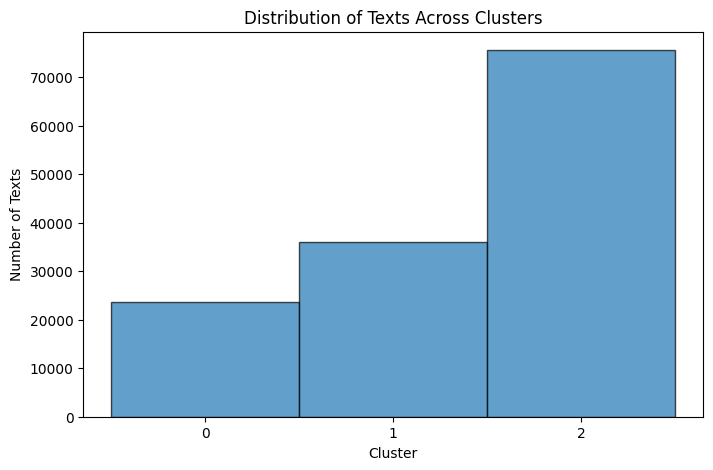

In [35]:
num_clusters = 3

# Plot cluster distribution
plt.figure(figsize=(8, 5))
plt.hist(kmeans_labels, bins=np.arange(num_clusters + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(num_clusters))
plt.xlabel("Cluster")
plt.ylabel("Number of Texts")
plt.title("Distribution of Texts Across Clusters")
plt.show()

The clustering is much better with Word2Vec embeddings.

In [ ]:
if not os.path.exists('./models/kmeans_word2vec_model.joblib'):
    joblib.dump(kmeans_word2vec_model, './models/kmeans_word2vec_model.joblib')

## Truncated SVD

In [36]:
file = './models/svd_word2vec_model.joblib'

if os.path.exists(file):
    X_reduced = load_model(file)

else:
    print("Failed to fetch model file. Creating model...")
    svd_word2vec_model = TruncatedSVD(n_components=2)
    print("Model created! Training...")
    X_reduced = svd_word2vec_model.fit_transform(X_train)

kmeans_word2vec_model = KMeans(n_clusters=num_clusters, random_state=10, n_init=10)
print("Fitting dimensionally reduced data to K-Means...")
# Apply K-Means on dimensionally reduced data
kmeans_word2vec_model.fit(X_reduced)

Trying to load model from file ./models/svd_word2vec_model.joblib...
Loaded model successfully!
Fitting dimensionally reduced data to K-Means...


KMeans(n_clusters=3, n_init=10, random_state=10)

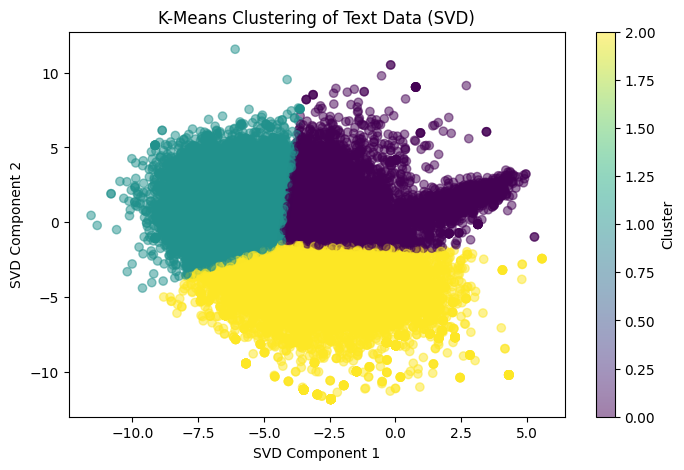

In [37]:
kmeans_labels = kmeans_word2vec_model.labels_

# Scatter plot of clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("K-Means Clustering of Text Data (SVD)")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Plot cluster distribution
plt.figure(figsize=(8, 5))
plt.hist(kmeans_labels, bins=np.arange(num_clusters + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xticks(range(num_clusters))
plt.xlabel("Cluster")
plt.ylabel("Number of Texts")
plt.title("Distribution of Texts Across Clusters")
plt.show()

In [ ]:
if not os.path.exists('./models/svd_word2vec_model.joblib'):
    joblib.dump(X_reduced, './models/svd_word2vec_model.joblib')